# Titanic Data Science Solutions

## 워크플로우
Competition solution의 워크플로우는 7가지 단계로 표현된다.

1. 문제 정의
2. 학습, 추론 데이터 획득
3. 데이터 전처리(Wrangle, prepare, cleanse)
4. 데이터 분석(Analyze, identify patterns, and explore the data)
5. 모델 생성, 추론과 문제 해결
6. 문제 해결 단계와 최종 솔루션을 시각화하고 보고서 형태로 작성하고 발표
7. 최종 결과물 제출

이러한 워크플로우는 각 단계가 다른 단계를 따를 수 있는 일반적인 순서를 나타낸다. 하지만 예외가 있는 경우가 존재한다.
- 여러 개의 워크플로우는 하나로 결합될 수 있다. 데이터를 시각화함과 동시에 분석할 수 있다.
- 어떤 단계가 위 순서보다 더 먼저 수행될 수 있다. 데이터 분석을 먼저 수행하고 wrangling을 진행할 수 있다.
- 어떤 단계는 여러 번 수행될 수 있다. 시각화의 경우 여러 번 수행된다.
- 어떤 단계는 필요하지 않을 수 있다. 

## 질문과 문제 정의
캐글과 같은 경쟁 사이트에는 해결하기 위한 문제가 정의되고 그와 동시에 Data Science Model를 학습시키기 위한 데이터셋과 평가 데이터셋이 제공된다. Titanic Survival competition의 문제 정의는 [이곳](https://www.kaggle.com/c/titanic)에 잘 정의되어 있다.
> 학습 데이터셋으로부터 타이타닉 승객의 생존 정보를 알 수 있고, 이를 이용해 우리의 모델로 하여금 주어진 테스트 데이터셋의 승객의 생존 정보를 예측한다.

우리는 문제의 영역에 대한 조기 이해를 발전시키고자 할 수 있다. 이 내용은 [Kaggle 경쟁 설명 페이지](https://www.kaggle.com/c/titanic)에 설명되어 있다. 아래는 주목할만한 내용이다.
- 1912년 4월 15일, 첫 항해 중 타이타닉호는 빙산과 출동한 후 가라앉았고, 승객과 승무원 2224명 중 1502명이 사망했다. 32%는 생존율을 의미한다.
- 난파선이 이러한 인명피해를 초라한 이유 중 하나는, 승객과 선원을 위한 구명보트가 충본하지 않았기 때문이다.
- 침몰 속에서 살아남은 운 좋은 요소가 있긴 했지만, 여성, 어린이, 상류층과 같은 몇몇 그룹 사람들은 다른 사람들보다 생존할 가능성이 높았다.

## 워크플로우 목표
Data Science Solutions의 워크플로우는 7개의 주요한 목표를 풀고자 한다.

**Classifying.** 우리는 우리의 샘플들을 분류하거나 카테고리화하기를 원할 수 있다. 또 우리는 다양한 클래스들이 우리의 목표에 미치는 영향이나 상관관계를 이해하기를 원할 수 있다. 

**Corrlating.** 학습 데이터셋에 포함된 Feature들을 토대로 문제에 접근할 수 있다. 데이터셋에 포함된 Feature들이 우리의 Solution에 크게 기여하는 것이 무엇일까? 통계적으로 Feature와 Solution 사이에 상관관계가 존재할까? Feature의 값이 변함에 따라 Solution도 상태가 변화할까, 혹은 그 반대일까? 이것은 주어진 데이터셋 내의 수치형 혹은 범주형 Feature에 의해 평가될 수 있다. 우리는 후속 목표와 워크플로우 단계를 위한 생존 이외의 Feature들 사이의 상관관계를 결정하기를 원한다. 특정 Feature들의 상관관계는 Feature를 생성하거나 완료하거나 수정하는데 도움이 될 수 있다.

**Converting.** 모델링 단계에서, 데이터를 준비하는 것이 필요하다. 모델 알고리즘의 선택에 따라 모든 Feature를 수치적으로 동일한 값으로 변환해야 할 수 있다. 예를 들어 텍스트 범주형 값을 숫자값으로 변환하는 것이 있다.

**Completing.** 데이터 준비는 우리로 하여금 Feature 내의 결측값을 추정하는 것을 요구할 수 있다. 모델 알고리즘은 결측값이 없을 때 잘 동작한다.

**Correcting.** 우리는 주어진 학습 데이터셋 Feature 내에 에러나 가질 수 있는 부정확한 값이 있는지 분석하고, 이러한 값들을 수정하거나 에러가 포함된 샘플들을 배제하는 시도를 할 수 있다. 이를 위한 방법 중 한 가지는 샘플들 혹은 Feature 사이에서 특이치를 탐지하는 것이다. 우리는 분석에 기여하지 않았거나 결과가 크게 왜곡될 수 있는 Feature의 경우 완벽하게 버릴 수 있다.

**Creating.** 존재하고 있는 Feature나 그 집합을 토대로 상관관계, 변환, 완전한 목표를 따르는 새로운 Feature를 만들 수 있을까. 

**Charting.** 데이터의 특징과 Solution 목표에 따라 올바른 시각화 그림과 차트를 선택하는 방법.

In [150]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## 데이터 획득
파이썬 판다스는 데이터셋을 다루는 데 유용하다. 우리는 학습과 테스트 데이터셋을 판다스 데이터프레임으로 변환함으로써 시작한다. 우리는 이 데이터셋들을 하나로 결합하여 특정 연산을 수행한다.

In [151]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
combine = [train_df, test_df]

## 설명된 데이터 분석
판다스는 프로젝트 초기에 다음과 같은 질문에 답변하는 데이터셋을 설명하는데 도움이 된다.

**데이터셋 내에서 어떤 Feature가 사용 가능할까?**

이러한 항목을 직접적으로 조작하거나 분석하기 위해 Feature이름을 기록한다. 이러한 Feature의 이름은 [Kaggle 데이터 페이지](https://www.kaggle.com/c/titanic/data)에 설명되어 있다.

In [152]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**어떤 Feature가 범주형일까?**

이러한 값들은 샘플들을 비슷한 샘플의 집합으로 분류한다. 범주형 Feature의 값들이 nomial(명목), ordinal(순서), ratio(비율), 간격 기준인가? 무엇보다도 이러한 것들은 적절한 시각화 그림을 선택하는 데 도움이 된다.

- 범주형 데이터 : Survived, Sex, and Embarked. 순서형 데이터 : Pclass.

**어떤 Feature가 수치형일까?**

수치형 값들은 샘플마다 다르다. 수치형 Feature의 값이 이산적인가, 연속적인가, 시계열 기반인가? 마찬가리로 이러한 것들은 시각화 그림을 선택하는데 유용하다.

- 연속적인 데이터 : Age, Fare. 이산적인 데이터 : Sibsp, Parch.

In [153]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**어떤 Feature가 혼합형 데이터인가?**

수치형, 알파벳 데이터가 한 Feature내에 존재한다. 수정하기 위한 후보들은 다음과 같다.
- Ticket은 숫자와 영문이 합쳐진 데이터 형태이다. Cabin도 영숫자의 형태이다.

**어떤 Feature가 에러나 오타를 포함하고 있는가?**

이 질문은 큰 데이터셋의 경우 검토하기 힘들지만, 작은 데이터셋의 몇몇 샘플에 대해서 검토하는 것은 어떤 Feature들을 수정해야 하는지 우리에게 명백하게 말해준다.
- Name Feature는 제목, 소괄호, 별명 혹은 짧은 이름에 사용되는 따옴표를 포함하여 이름을 설명하는 여러가지 방법이 존재하기 때문에 에러와 오타를 포함할 수 있다.

In [154]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**어떤 Feature가 결측값을 포함하고 있을까?**

이 경우 수정이 요구된다.
- 학습 데이터셋에서 Cabin > Age > Embarked Feature 순으로 결측치 값을 가지고 있다.
- 테스트 데이터셋에서는 Cabin > Age 순으로 불완전하다.

**다양한 Feature의 데이터 타입은 무엇인가?**
- 7개의 Feature는 정수형, 부동 소수형이다. 테스트 데이터셋의 경우는 6개이다.
- 5개의 Feature가 문자열(객체)이다.


In [155]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**샘플 전체의 수치형 Feature 값들의 분산은 무엇인가?**

이는 우리에게 다른 초기 통찰력 중에서 실제 문제 영역의 학습 데이터셋이 얼마나 대표적인지 결정하는 데 도움이 된다.
- 전체 샘플은 891개이며 실제 Titanic에 승선한 승객(2,224)의 40%이다.
- Survived는 0, 1값을 가지는 범주형 Feature이다.
- 전체 샘플의 38%가 생존했고 실제 타이타닉의 생존율인 32%를 대표한다.
- 대부분의 승객( > 75%)은 가족과 함께 여행하지 않았다.
- 30%의 가까운 승객들은 자매 혹은 배우자와 함께 배에 탔다.
- 요금은 상당히 다양하며 512 달러까지 지불한 승객(< 1%)은 거의 없었다.
- 65 ~ 80세 사이의 나이 든 승객(< 1%)은 거의 없었다.

In [156]:
train_df.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])
# Review survived rate using 'percentiles=[.61, .62]' knowing our problem description mentions 38% survival rate.
# Review Parch distribution using 'percentiles=[.75, .8]'
# SibSp distribution '[.68, .69]'
# Age and Fare '[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]'

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


**범주형 Feature의 분산은 어떻게 되는가?**
- Name은 모든 데이터가 각각 유일한 데이터이다.(count=unique=891)
- Sex 값은 두 개의 가능한 값을 가지고 65%는 남자이다.(top = male, freq=577/count=891)
- Cabin 값은 중복된 값이 존재한다. 몇몇 승객이 객실을 공유했다.
- Embarked는 3개의 가능한 값을 가진다. S 항구는 가장 많은 승객에 의해 사용되었다.(top=S)
- Ticket은 높은 비율(22%)로 중복된 값을 가진다.(unique=681)

In [157]:
train_df.describe(include=['O'])    # 문자열 데이터만 표시

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 데이터 분석에 기초한 가설
우리는 지금까지 진행한 데이터 분석에 기초하여 다음과 같은 가설에 도달했다. 우리는 적절한 조치를 취하기 전에 이러한 가설들을 검증할 수 있다.

**Correlating.**

우리는 각각 feature와 Survived의 상관관계가 얼마나 잘 맞는지 알고 싶어한다. 우리는 프로젝트 초기에 이를 수행하고 이들 상관관계와 프로젝트 후반부의 모델링된 상관관계를 일치시키기를 원한다.

**Completing.**

1. Age feature는 명백하게 Survived와 상관관계를 가지고 있기 때문에 완성하기를 원한다.
2. Embarked feature 또한 명백하게 Survived 혹은 다른 중요한 feature와 상관관계를 가지고 있기 때문에 완성하기를 원한다.

**Correcting.**

1. Ticket feature는 중복의 비율이 높아 분석에서 삭제될 수 있고 Survived와 상관관계가 없을 수 있다.
2. Cabin feature는 불완전하거나 학습, 테스트 데이터셋 모두에서 매우 많은 결측치를 가지고 있기 때문에 제거할 수 있다.
3. PassengerID feature는 Survived에 영향이 없기 때문에 학습 데이터셋에서 제거할 수 있다.
4. Name feature는 상대적으로 비표준적이고 생존에 직접적으로 기여하지 않기 때문에 제거할 수 있다.

**Creating.**

1. 승선한 가족 구성원의 총 수를 얻기 위해 Parch와 SibSp feature를 토대로 Family라고 부를 수 있는 feature를 만들 수 있다.
2. 새로운 Feature로써 Title을 추출하기 위해 Name feature를 가공하고자 할 수 있다.
3. Age bands라는 새로운 Feature를 생성하고 싶을 수 있다. 이것은 연속적인 수치형 Feature가 순서가 있는 범주형 Feature로 바뀌는 것을 말한다.
4. 분석에 도움이 된다면 Fare range Feature를 만들 수도 있다.

**Classifying.**

앞서 설명된 문제 정의에 기초하여 우리의 가설을 추가할 수 있다.

1. 여자(Sex=female)이 생존할 가능성이 더 높았다.
2. 아이들(Age<?)이 생존할 가능성이 더 높았다.
3. 높은 클래스의 승객(Pclass=1)이 생존할 가능성이 더 높았다.


## Feature를 Pivoting하여 분석

우리의 관찰과 가설을 확인하기 위해, 우리는 Feature 간의 상관관계를 Pivoting함으로써 빠르게 분석할 수 있다. 현재 단계에서는 빈 값이 없는 Feature에 대해서만 진행할 것이다. 또한 범주형(Sex), 순서형(Pclass), 이산형(SibSp, Parch) Feature에 대해서 이 작업을 하는 것이 좋다.

- **Pclass** 우리는 Pclass=1과 Survived 사이에 상당한 상관관계(>0.5)를 확인할 수 있다. 그러므로 Pclass feature를 우리의 모델에 포함시킨다.
- **Sex** 문제 정의 중 성별이 여자인 경우 생존율이 74%로 높았다는 관찰 결과를 확인한다.
- **SibSp and Parch** 이 Feature들은 특정값에 대해 상관 관계가 없다. 각각 Feature로부터 새로운 Feature나 Feature 집합을 도출하는 것이 가장 좋다.

In [158]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count()    # Pclass별 갯수

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [159]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).sum()  # Pclass별 생존자 수

,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [160]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# 막대그래프로 표현
# train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar() 

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [161]:
pd.crosstab(train_df['Pclass'], train_df['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [162]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


## 데이터 시각화를 통한 분석

지금부터 데이터 분석을 위해 시각화를 사용하여 우리의 가설을 검증할 수 있다.

### Correlating numerical features

수치적인 Feature들과 Survived(솔루션 목표) 사이의 상관관계를 이해하는 것부터 시작하자.

밴드 또는 범위를 통해 유용한 패턴을 식별할 수 있는 나이와 같은 연속적인 수치값들을 분석하는데 히스토그램 차트가 유용하다. 히스토그램은 자동적으로 정의된 bins 혹은 동일한 범위의 밴드를 사용하여 샘플들의 분산을 나타낼 수 있다. 이것은 우리에게 특정 밴드와 관련된 질문에 대답하는 것을 유용하게 해준다.(영유아가 생존율이 더 높은가?)

히스토그램 시각화에서 x축은 샘플의 수 혹은 승객의 수를 나타낸다.

**Observations.**

- 영유아(Age<=4)의 생존율이 높았다.
- 나이가 가장 많은 승객(Age=80)은 생존했다.
- 많은 수의 15 ~ 25살 승객은 살아남지 못했다.
- 대부분의 승객은 15 ~ 35살 사이이다.

**Decisions.**

이런 간단한 분석은 우리의 가설을 검증하는데 이 가설은 후속 워크플로우 단계에서 결정으로써 역할을 한다.

- 우리는 Age feature를 우리의 모델 학습에서 고려해야 한다(classifying #2).
- Age Feature의 결측치를 채워야 한다(completing #1).
- 연령대를 묶어서 밴드 형태로 표현해야 한다(creating #3).

In [163]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [164]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


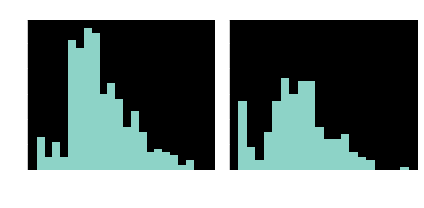

In [165]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Correlating numerical and ordinal features

상관 관계를 식별하기 위해 Single plot을 이용해 여러 개의 Feature를 결합할 수 있다. 이 작업은 숫자값을 가지고 있는 수치형 및 범주형 Feature에 대해서 수행될 수 있다.

**Observations.**

- 대부분의 승객이 Pclass=3이지만 대부분 생존하지 못했다. classifying assumption (#3)에서 확인할 수 있다.
- 영유아들 중 Pclass=2, 3이 경우 대부분이 생존했다. classifying assumption (#2)를 검증한다.
- Pclass=1인 승객은 대부분 생존하였고 classifying assumption (#3)을 뒷받침한다.
- Pclass는 승객의 연령 관점에서 다양하게 분포되어 있다.

**Descisions.**

- Pclass를 모델 학습에 고려하도록 하자.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


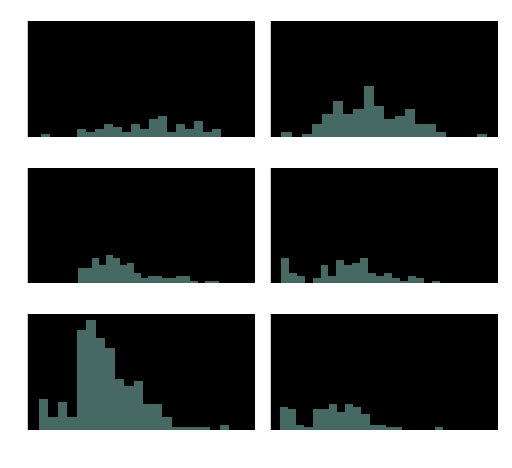

In [166]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived') # hue를 통해 색깔별로 구분
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6) # col, row를 통해 행과 열로 구분 / aspect는 너비와 높이의 비율, 기본값 1
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

### Correlating categorical features

범주형 Feature와 Survived(솔루션 목표)를 상호 연관시킬 수 있다.

**Observations.**

- 여성 승객들은 남자에 비해 생존율이 훨씬 높다. classifying (#1)을 통해 검증.
- 남성 승객들의 생존률이 더 높은 Embarked=C는 예외이다. 이것은 Pclass와 Embarked 그리고 Pclass와 Survived 사이의 상관관계로 볼 수 있지만, 반드시 Embarked와 Survived 사이의 직접적인 상관관계가 될 필요는 없다.
- Pclass=2, Embarked=C, Q인 남성들과 비교했을 때 Pclass=3의 남성들이 더 높은 생존율을 보였다. Completing (#2).
- Pclass=3와 남성 승객 사이에서의 생존율은 Embarked에 따라 다르다.

**Decisions.**

- Sex feature를 모델 학습에 추가하자.
- Embarked feature를 완성하고 모델 학습에 추가하자.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


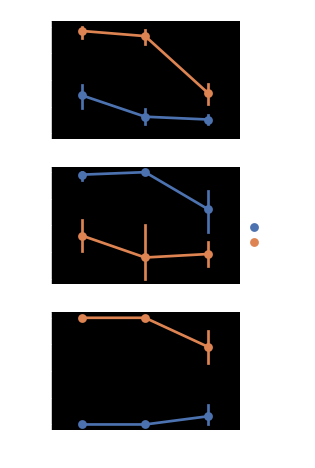

In [167]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Correlating categorical and numerical features

또한 범주형 Feature(수치형 값이 아닌)와 수치형 Feature 사이의 상호 연관시킬 수 있다. Embarked(숫자가 아닌 범주형), Sex(숫자가 아닌 범주형), Fare(연속적인 숫자형)과 Survived (숫자값을 가진 범주형) 사이의 상관관계를 고려해야 한다.

**Observations.**

- 높은 요금을 지불한 승객은 생존율이 높았다. creating (#4) Fare ranges를 통해 검증한다.
- Embarked는 생존율과 상관관계가 있다. correlating (#1), completing (#2)를 확인한다.

**Decisions.**

- Fare feature를 범위화하는 것을 고려하자.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


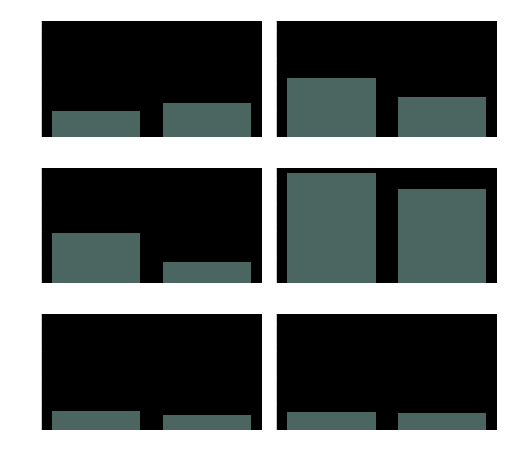

In [168]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'g'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Wrangle data

데이터셋과 솔루션 요구 사항에 대한 몇몇의 가설과 결정들을 수집했다. 이러한 결과를 얻기까지 하나의 feature나 값들을 수정할 필요가 없았다. 이제 목표를 수정, 생성, 완료하기 위해 우리의 결정과 가설을 실행하자.

#### Correcting by dropping features

이 방법은 목표에 도달하는데 있어서 좋은 시작이다. feature를 제거함으로써 우리는 적은 데이터를 다룰 수 있다. 이는 실행속도를 증가시키고 분석을 용이하게 한다.

우리의 가설과 결정에 따르면 Cabin(correcting #2)와 Ticket(correcting #1) feature는 제거한다.

일관성을 유지하기 위해 학습 및 테스트 데이터셋 모두에 대해 같은 작업을 수행한다.


In [169]:
print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


### Creating new feature extracting from existing

Name과 PassengerID를 제거하기 전에, Name에서 제목을 추출하고 제목과 생존사이의 상관관계를 확인할 수 있는지 분석하기를 원한다.

(\w+)\\.의 정규표현식 패턴을 이용해 제목을 추출할 수 있다. 이 패턴은 Name feature에서 . 이전에 문자들과 매칭시킨다. `expand=False`를 이용해 DataFrame을 반환한다.

**Observations.**

Title, Age, Survived에 대해 그래프를 그릴 때, 다음 사항을 확인해야 한다.

- 대부분의 Title은 나이 그룹을 정확하게 묶는다. 예를 들면 Master title의 평균 연령은 5살이다.
- Title Age band 사이의 생존율을 조금씩 다르다.
- 특정 Title은 대부분 생존하거나(Mme, Lady, Sir) 그렇지 못했다(Don, Rev, Jonkheer).

**Decisions.**
- 모델 학습을 위해 새로은 Title feature를 만들기로 하자.

In [176]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


우리는 많은 Title을 더 흔한 이름으로 대체하거나 `Rare`로 분류할 수 있다.

In [116]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


또한 범주형 Title을 순서형으로 변환할 수 있다.

In [117]:
title_mapping = {"Mr":1, "Miss" : 2, "Mrs" : 3, "Master" : 4, "Rare" : 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


이제 안전하게 학습 및 테스트 데이터셋에서 Name feature를 제거할 수 있다. 또한 PassengerId feature는 불필요하다. 

In [118]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Converting a categorical feature

문자열로 된 feature를 숫자값으로 변환해줄 수 있다. 이 작업은 대부분의 모델 알고리즘에 요구된다. 이렇게 함으로써 목표를 완성시킬 수 있는 feature를 얻을 수 있다.

Sex feature를 Gender라는 새로운 feature로 변환해보자.(female=1, male=0)

In [119]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female' : 1, 'male' : 0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Completing a numerical continuous feature

null 값이 존재하는 feature에 대해서 값을 추정하고 완성시켜야 한다. 가장 먼저 Age feature에 대해서 이 작업을 수행할 것이다.

연속적인 수치형 Feature를 완성시킬 때 3가지의 방법이 있다.
1. 간단한 방법은 평균과 표준편차를 가지고 임의의 수를 생성하는 것이다.
2. 결측값을 예측하는데 좀 더 정확한 방법은 다른 Feature의 상관관계를 이용하는 것이다. 이 경우에는 Age, Gender, Pclass와의 상관관계를 주목해보자. Pclass와 Gender feature의 조합을 통해서 Age의 중앙값을 파악하여 이를 이용할 수 있다. Pclass=1, Gender=0인 경우 Age의 중앙값을 이용.
3. 1번과 2번 방법을 결합할 수 있다. 중앙값에 기반해 예측하는 것이 아닌, Pclass와 Gender 조합의 평균, 표준쳔파, 분산 등을 이용해 임의의 숫자를 사용하는 것이다.

1번, 3번 방법의 경우 random noise를 발생시킬 수 있다. 실행할 때마다 달라질 수 있기 때문이다. 때문에 2번 방법으로 진행해보자.


/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


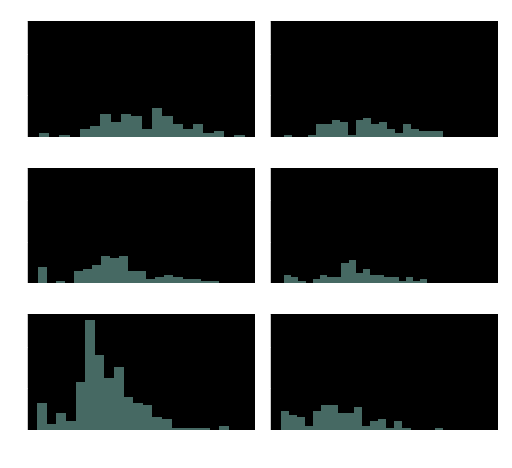

In [120]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [121]:
guess_ages = np.zeros((2, 3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Sex(0, 1)과 Pclass(1, 2, 3)에 대해 계산하여 각각의 경우 Age를 예측한다.

In [122]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5) * 0.5
    
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i, j]
    
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Age band를 생성하고 Survived와의 상관관계를 결정해보자.

In [123]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


위 밴드에 맞게 Age를 순서형으로 바꿔보자.

In [124]:
for dataset in combine:
    dataset.loc[ dataset.Age <= 16, 'Age'] = 0
    dataset.loc[ (dataset.Age > 16) & (dataset.Age <= 32), 'Age'] = 1
    dataset.loc[ (dataset.Age > 32) & (dataset.Age <= 48), 'Age'] = 2
    dataset.loc[ (dataset.Age > 48) & (dataset.Age <= 64), 'Age'] = 3
    dataset.loc[ (dataset.Age > 64), 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


이제 AgeBand feature를 제거할 수 있다.

In [125]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Create new feature combining existing features

Parch와 SibSp feature를 결합해 FamilySize라는 새로운 feature를 생성할 수 있다. 이 작업을 한 후 Parch와 SibSp를 제거할 수 있다.

In [126]:
for dataset in combine:
    dataset['FamilySize'] = dataset.SibSp + dataset.Parch + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


위 내용을 토대로 IsAlone이라는 새로운 Feature를 만들 수 있다.

In [127]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset.FamilySize == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


SibSp, Parch, FamilySize feature는 제거하도록 하자.

In [128]:
train_df = train_df.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


또한 Pclass와 Age feature를 결합하여 새로운 feature를 만들 수 있다.

In [129]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completing a cateogrical feature

Embarked feature는 승선항을 기준으로 S, Q, C의 값을 가진다. 우리의 학습 데이터셋은 두 개의 결측치가 존재한다. 이 값들을 가장 흔한 값으로 채워넣을 것이다.

In [130]:
freq_port = train_df.Embarked.dropna().mode()[0]    # mode는 최빈값을 구하는 메서드
freq_port

'S'

In [131]:
for dataset in combine:
    dataset.Embarked = dataset.Embarked.fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeirc

결측치를 채운 Embarked feature를 범주형에서 수치형으로 바꿀 수 있다.

In [132]:
for dataset in combine:
    dataset.Embarked = dataset.Embarked.map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Quick completing and converting a numeric feature

Fare feature는 테스트 데이터셋에 한 개의 결측값이 존재한다. 이를 최빈값으로 채워넣는 코드를 한 줄로 작성할 수 있다.

한 개의 값만 대체하므로 새로운 feature를 생성하거나 결측값을 예측하기 위한 상관 관계 분석이 필요하지 않는다는 것에 주목하라. 그럼으로써 모델 알고리즘은 결측값이 존재하지 않는 상태에서 동작한다.

In [133]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


이제 FareBand feature를 구성할 수 있다.

In [134]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4) # pd.cut의 경우 동일한 길이로 구간을 나누고 pd.qcut의 경우 동일한 데이터 개수로 구간을 나눈다.
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [135]:
for dataset in combine:
    dataset.loc[dataset.Fare <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset.Fare > 7.91) & (dataset.Fare <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset.Fare > 14.454) & (dataset.Fare <= 31.0), 'Fare'] = 2
    dataset.loc[dataset.Fare > 31, 'Fare'] = 3
    dataset.Fare = dataset.Fare.astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [136]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## 모델, 추론 그리고 해결

이제 모델 학습하고 목표를 추론할 준비가 되었다. 60가지가 넘는 예측 가능한 모델 알고리즘이 존재한다. 평가할 수 있는 몇 가지 모델로 범위를 좁히기 위해서 문제의 유형과 솔루션 요구 사항을 이해해야 한다. 우리의 문제는 분류, 회귀 문제이다. 우리는 결과값(Survived or not)과 다른 feature(Age, Port ...) 간의 관계를 식별하려고 한다. 우리는 주어진 데이터셋으로 모델을 학습시키는 지도 학습이란 머신러닝의 방법을 수행하고 있다. 지도 학습과 분류, 회귀라는 기준점을 통해 우리는 모델 선택의 폭을 줄일 수 있다. 아래와 같은 모델 알고리즘이 가능하다.

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forest
- Perceptron
- Aritificial neural network
- RVM or Relevance Vector Machine

In [137]:
X_train = train_df.drop(['Survived'],axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

로지스틱 회귀는 워크플로우 초기에 사용하게 유용한 모델이다. 로지스틱 회귀 분석은 누적 로지스틱 분포인 로지스틱 함수를 사용하여 확률을 추정함으로써 범주형 종속 변수와 하나 이상의 독립 변수 사이의 관계를 측정한다. 

학습 데이터셋을 기반으로 모델에 의해 생성된 신뢰도 점수를 기록해보자.

In [138]:
# Logistice Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.37

로지스틱 회귀를 사용하여 feature 생성과 솔루션 완성에 관한 가설들과 결정을 검증할 수 있다. 이는 결정 함수에서의 feature 계수를 계산함으로써 수행될 수 있다. 

양의 계수는 log-odds의 반응을 증가시키고(따라서 확률이 증가한다) 음의 계수는 log-odds의 반응을 감소시킨다.(따라서 확률이 감소한다.)

- Sex는 가장 높은 양의 계수를 가지고 있으므로, Sex value의 증가(male : 0 to female : 1)는, 생존율의 증가를 암시힌다.
- 반면에 Pclass가 증가하면 생존율은 감소한다.
- 같은 방식으로 Age*Class는 잘 만들어낸 feature로 생존율의 상관관계에서 두 번째로 큰 음의 계수를 가지고 있다.
- Title feature는 두 번째로 높은 양의 계수를 가지고 있다.

In [139]:
coeff_df = pd.DataFrame(train_df.columns.delete(0)) # delete(index) : 해당 index의 컬럼을 삭제
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201057
5,Title,0.406027
4,Embarked,0.276628
6,IsAlone,0.185986
7,Age*Class,-0.050260
3,Fare,-0.071665
2,Age,-0.469638
0,Pclass,-1.200309


다음 모델은 Support Vector Machines라는 모델을 사용한다. 이 모델은 지도학습 모델로, 분류와 회귀 분석에서 사용되는 데이터를 분석하는 학습 알고리즘과 관련이 있다. 두 카테고리 중 하나 혹은 다른 카테고리에 포함된 것으로 표시되는 학습 샘플이 주어지면, SVM 훈련 알고리즘은 새로운 테스트 샘플을 두 개의 범주로 할당하는 모델을 구축하여 비확률적인 이진 선형 분류기로 만든다. 

로지스틱 회귀보다 더 높은 신뢰도 점수를 생성하는 것에 주목하자.

In [140]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.83

패턴 인식에서 K-최근접 이웃 알고리즘(k-NN)은 분류와 회귀에서 사용되는 비모수적 방법이다. 한 샘플은 그의 이웃의 다수결로 분류되고 샘플은 가장 가까운 k개의 이웃 중에서 가장 일반적인 클래스에 할당된다(k는 양의 정수이고 보통 작은 수이다). 만약 k=1이라면 객체는 단순히 가장 가까운 단일 이웃의 클래스에 할당된다.

KNN의 신뢰도 점수는 로지스틱 회귀보단 높지만 SVM보다는 낮다.

In [141]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.06

기계학습에서 나이브 베이즈 분류기는 단순한 확률적 분류기 계열인데, feature 간 강한(naive) 독립적 가정과 함께 Bayes' 이론이 적용되는 것에 기초한 분류기이다. 나이브 베이즈 분류기는 확장성이 매우 좋아 학습과 관련하여 변수의 수만큼 선형적인 파라미터를 요구한다.

이 모델의 신뢰도 점수는 지금까지 생성한 신뢰도 점수 중에서는 가장 낮은 점수이다.

In [142]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.88

퍼셉트론은 이진 분류기(벡터로 표현되는 입력이 특정 클래스에 속하는지 아닌지 결정하는 함수)의 지도 학습을 위한 알고리즘이다. 선형 분류기의 일종으로, 가중치 집합을 feature vector와 결합하는 선형 예측 함수를 통해 예측을 하는 분류 알고리즘이다. 이 알고리즘은 한 번에 하나씩 학습 데이터셋의 요소를 처리하기 때문에 online learning을 허용한다.


In [143]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.35

In [144]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


79.46

In [145]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.25

이 모델은 예측 모델로 의사 결정 트리를 사용하는데, 이는 features(tree branches)를 목표 값(tree values)으로 매핑한다. 목표 값이 유한한 값의 집합을 가질 경우, 트리 모델을 분류 트리라고 한다. 이러한 트리 구조에서, 잎은 클래스 레이블을 나타내고 가지는 클래스 레이블로 이어지는 feature들의 결합을 나타낸다. 의사 결정 트리에서 목표 값이 연속적인 값(일반적으로 실수)을 가지는 경우 회귀 트리라고 한다.

이 모델의 신뢰도 점수는 지금까지 중에 가장 높다.

In [146]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

다음 모델은 랜덤 포레스트로 가장 인기있는 모델 중 하나이다. 랜덤 포레스트 혹은 랜덤 의사 결정 포레스트는 분류, 회귀 및 기타 작업을 위한 앙상블 학습 방법이다. 학습할 때, 다수의 의사 결정 트리(n_estimators=100)를 구성하고 각 트리의 클래스(분류) 혹은 평균 예측(회귀) 방식으로 클래스를 출력한다.

이 모델이 가장 신뢰도 점수가 높기 때문에 우리는 이 모델의 예측값을 최종 제출 결과물로 사용할 것이다.

In [147]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

### 모델 평가

지금까지의 수행한 모델들의 점수로 순위를 매겨 가장 좋은 모델을 선택할 수 있다. 의사 결정 트리와 랜덤 포레스트가 동일한 점수를 기록했지만, 의사 결정 트리의 경우 학습 데이터에 오버피팅되는 경우가 잦기 때문에 랜덤 포레스트를 최종 모델로 선택한다.

In [148]:
models = pd.DataFrame({
    'Model' : ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent',
    'Linear SVC', 'Decision Tree'],
    'Score' : [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,84.06
0,Support Vector Machines,82.83
2,Logistic Regression,81.37
6,Stochastic Gradient Decent,80.25
7,Linear SVC,79.46
5,Perceptron,79.35
4,Naive Bayes,76.88


In [149]:
submission = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Survived' : Y_pred
})
submission
# submission.to_csv('../output/submission.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


실제 이 결과물은 6,082 중 3,883 등이다. 이 결과는 제출 데이터의 일부만 설명한다.